In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


# Generate sample data with added noise

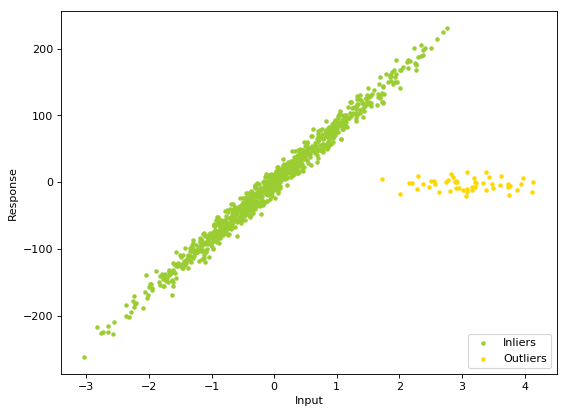

In [11]:
n_samples = 1000
n_outliers = 50

### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
# noise: The standard deviation of the gaussian noise applied to the output.
# coef = True, the coefficients of the underlying linear model are returned.
# random_state: Determines random number generation for dataset creation.
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1)) # vertical: n x 1
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers) # 1 x n

lw = 2
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

# Linear regression model estimation

Estimated coefficients (true, linear regression):
82.1903908407869 [54.17236387]


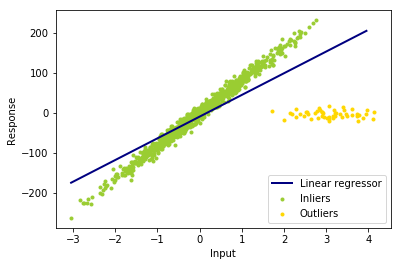

In [8]:
n_samples = 1000
n_outliers = 50

### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
# noise: The standard deviation of the gaussian noise applied to the output.
# coef = True, the coefficients of the underlying linear model are returned.
# random_state: Determines random number generation for dataset creation.
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1)) # vertical: n x 1
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers) # 1 x n

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression):")
print(coef, lr.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()


# Robust linear model estimation using RANSAC


In this example we see how to robustly fit a linear model to faulty data using
the RANSAC algorithm.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html


Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [5.89742346] [-4.54535418]


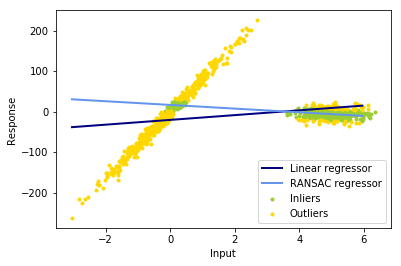

In [19]:
n_samples = 1000
n_outliers = 500

### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
# noise: The standard deviation of the gaussian noise applied to the output.
# coef = True, the coefficients of the underlying linear model are returned.
# random_state: Determines random number generation for dataset creation.
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 5 + 0.5 * np.random.normal(size=(n_outliers, 1)) # vertical: n x 1
y[:n_outliers] = -5 + 10 * np.random.normal(size=n_outliers) # 1 x n

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()